# Perceptron studies

  Este tópico abordará a criação de um simples perceptron.
Um perceptron é uma unidade básica de uma rede neural artificial, comumente utilizada em modelos de aprendizado de máquina. Ele é inspirado no funcionamento dos neurônios no cérebro humano. Um perceptron recebe entradas, aplica pesos a essas entradas, soma esses produtos ponderados e, em seguida, aplica uma função de ativação para gerar a saída.

A fórmula de um perceptron pode ser representada por:

> y=f(∑i=1n​(xi​⋅wi​)+b)

## Lógica por trás de um Preceptron
  Um perceptron é a unidade lógica da rede neural. Neste módulo irei explicar o seu fucionamento. Podemos nos inspirar em um neurônio biológigo tal que as entradas são os dentritos, o núcleoo processamento e a bainha de mielina o output. A estrutura de um perceptron é dada pela camada de entrada, camada oculta e camada de saída. Na camada de entrada, de maneira autoexplicativa, temos a entrada dos dados, a camada oculta temos o cálculo do dos pesos com as estradas e na camada de saída temos este valor calculado pela função de ativação. Dado isso, eis a ordem lógica de processamento de um perceptron.

  1. Inicialização dos PESOS e BIAS
  2. Cálculo da SAÍDA
  3. Cálculo do ERRO
  4. Atualização dos PESOS e BIAS
  5. Backpropagation
  6. Convergência

### 1. Inicialização dos PESOS e BIAS
Os pesos e o viés do neurônio são inicializados com valores aleatórios ou pequenos valores próximos de zero.
Os pesos determinam a inflência de cada entrada no cálculo da saída.
O viés ajusta o ponto de ativação do neurônio

### 2. Cálculo da SAÍDA
A saída do neurônio é calculada a partir da soma ponderada das entradas com os pesos correspondentes e o viés.
O resultado da soma é passado para a função de ativação, que determina se o neurônio será ativado ou não.

### 3. Cálculo do ERRO
O erro é calculado a partir da diferença entre o valor esperado e o valor obtido na saída do neurônio.
Isso resulta em uma medida de quão bem o neurônio está realizando a tarefa.

### 4. Atualização dos PESOS e BIAS
O perceptron, backpropagation, ou descida do gradiente ajusta os pesos e o viés do neurônio proporcionalmente ao erro calculado.
É feito usando informações sobre a direção em que o erro está dimuindo para mnimizá-lo.



# Perceptron somente com NumPy
Neste módulo será criado um perceptron para classificação de dados utilizando somente a bilbioteca NumPy para tal dever. Matplotlib e sklearn doram utilizados para plotar gráficos e gerar valores randômicos.

Acurácia do Perceptron: 95.00%


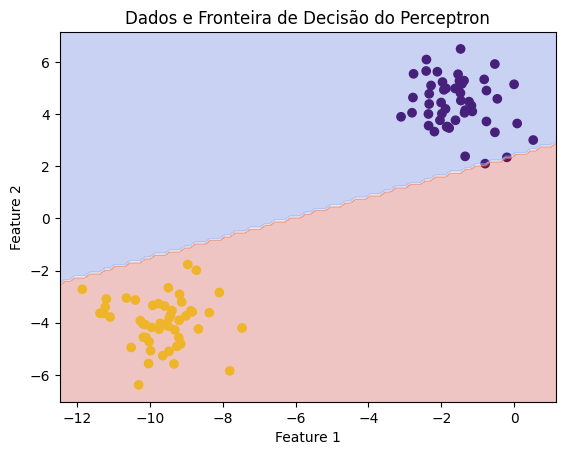

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Função de ativação (step function)
def step_function(x):
    return np.where(x > 0, 1, 0)

# Função para treinar o perceptron
def train_perceptron(X_train, y_train, learning_rate=0.01, epochs=200):
    # Adicionar uma coluna de 1 para o termo de polarização (bias)
    X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Inicializar pesos aleatórios
    np.random.seed(42)
    weights = np.random.rand(X_train_bias.shape[1])

    for epoch in range(epochs):
        # Calcular a saída do perceptron
        predictions = step_function(np.dot(X_train_bias, weights))

        # Atualizar os pesos com base no erro
        error = y_train - predictions
        weights += learning_rate * np.dot(error, X_train_bias) / len(X_train)

    return weights

# Função para calcilar a acurácia
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Gerar dados
X, y = make_blobs(centers=2, cluster_std=1, random_state=1)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o perceptron
weights = train_perceptron(X_train, y_train)

# Adicionar uma coluna de 1 para o termo de polarização (bias) nos dados de teste
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Fazer previsões no conjunto de teste
y_pred = step_function(np.dot(X_test_bias, weights))

# Calcular a acurácia
accuracia = accuracy(y_test, y_pred)
print(f'Acurácia do Perceptron: {accuracia * 100:.2f}%')

# Plotar os dados e a fronteira de decisão do perceptron
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Dados e Fronteira de Decisão do Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotar a fronteira de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = step_function(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()


## Recriando a função para uma aproximação maior

O Objetivo agora é dazer uma acurácia de 100% em relaçãoa o exemploa anterior

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs


In [21]:

# Função de ca´clculo do perceptron
def fit(X, y, n_iter=100, learning_rate=0.1):
    n_samples, n_features = X.shape

    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
    weights = np.random.default_rng().random(n_features + 1)

    for _ in range(n_iter):
        linear_output = X @ weights
        y_pred = (linear_output > 0).astype(int)

        misclassified = np.nonzero(y_pred != y)[0]
        if misclassified.size == 0:
            break

        delta = learning_rate * (y - y_pred) @ X[misclassified]
        weights += delta

    return weights

def predict(X, weights):
    n_samples = X.shape[0]
    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
    linear_output = X @ weights
    predictions = (linear_output > 0).astype(int)

    return predictions

#Função para calcular a acurácia
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

def score(X, y, y_pred):
    accuracy = np.mean(y == y_pred) * 100
    return "{:.2f}%".format(accuracy)


# Função para plotar o gráfico
def plot_predict(X, y, weights):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('Dados e Fronteira de Decisão do Perceptron')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100)
    y_line = (-weights[0] * x_line - weights[2]) / weights[1]
    plt.plot(x_line, y_line, color='black')
    plt.show()


## Agora iremos plotar os dados criados de maneira randômica



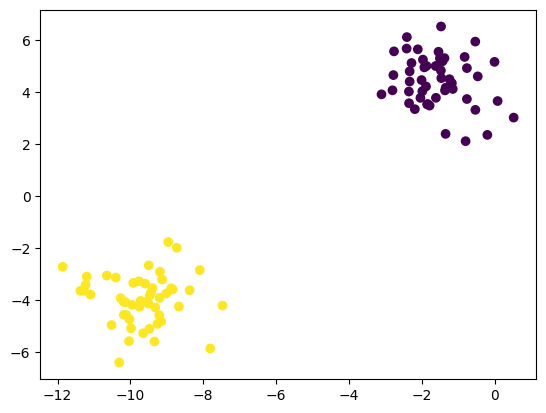

In [22]:
X, y = make_blobs(centers=2, cluster_std=1, random_state=1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Plotando o gráfico após a ação do Perceptron simples

1. Também será impresso a acurácia do exemplar

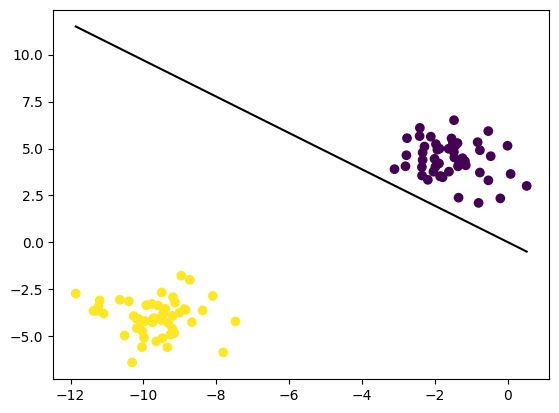

Acurácia do Perceptron: 95.00%


In [25]:
p_fit = fit(X, y)
plot_predict(X, y, p_fit)

print(f'Acurácia do Perceptron: {accuracy(y_test, y_pred) * 100:.2f}%')